In [20]:
import shap
import tensorflow as tf
from pandas import read_parquet
from tensorflow.keras.models import load_model

from data import file
from data.file import model_convolutional_dataset
from reporting.evaluation import plot_shap

tf.compat.v1.disable_eager_execution()

In [21]:
print("SHAP version is      :", shap.__version__)
print("Tensorflow version is:", tf.__version__)

SHAP version is      : 0.40.0
Tensorflow version is: 2.6.2


In [22]:
model = load_model(model_convolutional_dataset)

In [23]:
data = read_parquet(file.adversarial_images)

In [24]:
wrong_predictions = data[data.prediction!=data.label]
wrong_predictions

,image,label,prediction
0,"[0.05, 0.05, 0.05, 0.05, 0.05, -0.05, -0.05, -...",5,3
8,"[0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.0...",1,8
10,"[-0.05, 0.05, -0.05, 0.05, 0.05, 0.05, 0.05, 0...",3,9
11,"[-0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0....",5,8
14,"[0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.0...",1,8
16,"[0.05, 0.05, -0.05, 0.05, 0.05, 0.05, 0.05, 0....",2,7
19,"[-0.05, 0.05, -0.05, 0.05, 0.05, 0.05, 0.05, 0...",9,7
22,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...",9,7
24,"[-0.05, -0.05, -0.05, -0.05, -0.05, -0.05, 0.0...",1,2
25,"[0.05, -0.05, -0.05, -0.05, -0.05, -0.05, -0.0...",2,3


Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


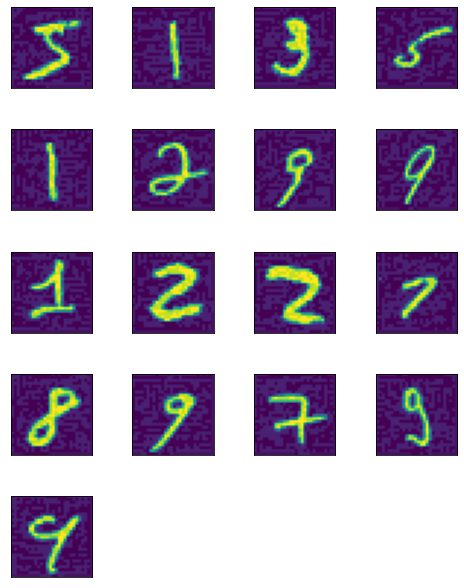

In [25]:
from reporting.images import display_dataframe
from pandas import Series

x = wrong_predictions.image
images = x.apply(Series).stack().to_numpy().reshape(x.shape[0], 28, 28, 1)
display_dataframe(images)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


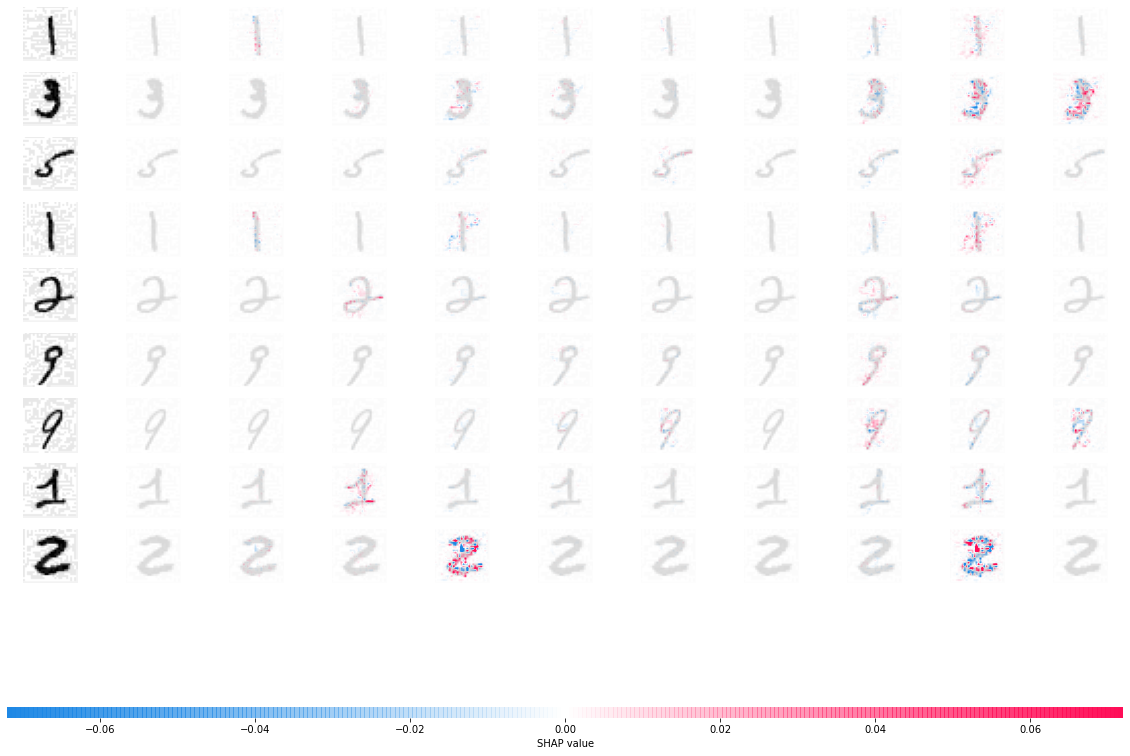

In [26]:
plot_shap(model, images, elements=10, population=10)